![logo](https://drive.google.com/uc?export=view&id=1QJ9PAT9q-Ksv_Vs_pLXtLHxjjV-9FMTz)



<h1><b> DDoS Detection and Mitigation using Machine Learning<b></h1>

_Prepared by_ **Noureldin Mohamed**



# Introduction

In the realm of cybersecurity, a Denial of Service (DoS) attack stands as a malicious endeavor aimed at disrupting the availability of a targeted system, be it a website or application, by inundating it with a massive volume of packets or requests. This concerted effort overwhelms the system, rendering it temporarily or entirely inaccessible to legitimate users. The advent of Distributed Denial of Service (DDoS) attacks further amplifies this challenge, as attackers orchestrate these assaults using multiple compromised or controlled sources. Recognizing and swiftly classifying such attacks become pivotal in preserving the integrity and availability of online platforms, safeguarding against potential disruptions to essential services.

Our exploration zooms in on the broader landscape of DDoS attacks, where malevolent actors leverage a network of compromised computers to inundate a target system with traffic, causing widespread disruption. The critical need to distinguish between normal and malicious network behavior emerges as a linchpin in fortifying systems against these disruptive forces. Acknowledging the intricacies of this task, our approach pivots towards the formidable capabilities of Machine Learning (ML). ML offers a systematic and adaptive methodology for discerning patterns within expansive datasets, making it an ideal candidate for differentiating between benign and malicious network activity. Anchored by the utilization of the [apaddos-dataset](https://www.kaggle.com/datasets/yashwanthkumbam/apaddos-dataset/data), a specialized resource tailored for comprehending DDoS attacks, our journey aims to empower systems with the ability to autonomously identify and respond to potential threats, ushering in a more secure digital environment.

![DDOS](https://www.f5.com/content/dam/f5-labs-v2/article/articles/edu/20190605_what_is_a_ddos/DDoS_attack.png)

# **Imports**

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# **Loading The Data**

In [2]:
!gdown 1LRRE_Qy9oJRrYY_i0d227b0vVF_NnH4G # Download the data from the drive

Downloading...
From: https://drive.google.com/uc?id=1LRRE_Qy9oJRrYY_i0d227b0vVF_NnH4G
To: /content/DDoS-Dataset.csv
100% 21.7M/21.7M [00:00<00:00, 41.2MB/s]


Lets load the data into a dataframe.

In [3]:
ddos=pd.read_csv('DDoS-Dataset.csv') # Place the data in a dataframe

Lets Display the data frame, and check some info about the dataset.

In [4]:
ddos

,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,tcp.seq,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.923006000 Mountain Dayli...,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.935672000 Mountain Dayli...,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.957469000 Mountain Dayli...,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.970971000 Mountain Dayli...,10,1175,6,560,4,615,Benign


In [5]:
ddos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151200 entries, 0 to 151199
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip.src           151200 non-null  object
 1   ip.dst           151200 non-null  object
 2   tcp.srcport      151200 non-null  int64 
 3   tcp.dstport      151200 non-null  int64 
 4   ip.proto         151200 non-null  int64 
 5   frame.len        151200 non-null  int64 
 6   tcp.flags.syn    151200 non-null  int64 
 7   tcp.flags.reset  151200 non-null  int64 
 8   tcp.flags.push   151200 non-null  int64 
 9   tcp.flags.ack    151200 non-null  int64 
 10  ip.flags.mf      151200 non-null  int64 
 11  ip.flags.df      151200 non-null  int64 
 12  ip.flags.rb      151200 non-null  int64 
 13  tcp.seq          151200 non-null  int64 
 14  tcp.ack          151200 non-null  int64 
 15  frame.time       151200 non-null  object
 16  Packets          151200 non-null  int64 
 17  Bytes     

We have different features each providing different information about network traffic. Here's a brief explanation of some of the columns based on their headings:

1. **ip.src:** Source IP address of the network traffic.
2. **ip.dst:** Destination IP address of the network traffic.
3. **tcp.srcport:** Source port number for TCP (Transmission Control Protocol).
4. **tcp.dstport:** Destination port number for TCP.
5. **ip.proto:** IP protocol used (e.g., TCP, UDP).
6. **frame.len:** Length of the network frame.
7. **tcp.flags.syn:** TCP SYN flag.
8. **tcp.flags.reset:** TCP RST flag.
9. **tcp.flags.push:** TCP PUSH flag.
10. **tcp.flags.ack:** TCP ACK flag.
11. **ip.flags.mf:** IP More Fragments flag.
12. **ip.flags.df:** IP Do Not Fragment flag.
13. **ip.flags.rb:** Reserved bits in the IP header.
14. **tcp.seq:** TCP sequence number.
15. **tcp.ack:** TCP acknowledgment number.
16. **frame.time:** Timestamp of the network frame.
17. **Packets:** Number of packets in the network frame.
18. **Bytes:** Number of bytes in the network frame.
19. **Tx Packets:** Number of transmitted packets.
20. **Tx Bytes:** Number of transmitted bytes.
21. **Rx Packets:** Number of received packets.
22. **Rx Bytes:** Number of received bytes.
23. **Label:** The label or category assigned to the network event (e.g., 'DDoS-PSH-ACK', 'Benign', 'DDoS-ACK').

These columns provide information about the source and destination of the traffic, the protocol used, flags in the TCP header, packet and byte counts, and the label of network event.

# **Exploratory Data Analysis**


Exploratory Data Analysis (EDA) is a crucial process in the realm of data analysis, involving the examination and summarization of a dataset to unravel its inherent structure and relationships. It serves as a foundational step in the broader data science journey, enabling a comprehensive understanding of patterns, trends, and anomalies that might not be immediately apparent.

When it comes to Machine Learning (ML), EDA holds several advantages:

- **Understanding the Data:** EDA provides a comprehensive grasp of the dataset, elucidating the distribution of data, inter-feature relationships, and the presence of any missing or corrupted values.

- **Identifying Potential Issues:** EDA serves as a detective tool, helping unveil potential issues within the data, such as missing values or outliers. Detecting and addressing these problems early on is crucial for the optimal performance of your ML model.

- **Informing Model Selection:** EDA guides the selection of appropriate ML models by shedding light on the dataset's characteristics. For instance, if the data exhibits highly non-linear relationships, choosing a model capable of capturing complex patterns, like a neural network, may be warranted.

- **Improving Model Performance:** A deep understanding of the data's structure acquired through EDA facilitates the fine-tuning of ML model hyperparameters. This optimization process contributes to enhanced model performance.

In essence, EDA serves as a cornerstone in the broader ML workflow, offering insights into the data and aiding in the identification of potential issues that may influence model performance. EDA is a dynamic process, providing the flexibility to explore various ways to dissect and interpret the dataset.

## **Checking for nulls**
Checking for nulls (or missing values) in a dataset is a crucial step in the data preprocessing phase. Detecting and handling null values is essential to avoid any misinterpretation.

In [6]:
ddos.isna().sum()

ip.src             0
ip.dst             0
tcp.srcport        0
tcp.dstport        0
ip.proto           0
frame.len          0
tcp.flags.syn      0
tcp.flags.reset    0
tcp.flags.push     0
tcp.flags.ack      0
ip.flags.mf        0
ip.flags.df        0
ip.flags.rb        0
tcp.seq            0
tcp.ack            0
frame.time         0
Packets            0
Bytes              0
Tx Packets         0
Tx Bytes           0
Rx Packets         0
Rx Bytes           0
Label              0
dtype: int64

## **Checking for duplicates**
Duplicate entries can introduce inaccuracies in analyses and statistical summaries, leading to distorted insights. Ensuring data accuracy is paramount, and detecting and eliminating duplicates is a key step in achieving this. This can result in overfitting, where the model performs well on the training data but poorly on new, unseen data (biased model), so to avoid this we drop duplicates

In [7]:
ddos.duplicated().sum()

0

There are no duplicates or nulls that needs to be dropped, so we can proceed into our analysis.

In [8]:
ddos.groupby('Label').size()

Label
Benign          75600
DDoS-ACK        37800
DDoS-PSH-ACK    37800
dtype: int64

We have 75600 Benign, and 75600 DDOS attacks

## **Exploring Relations between features**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


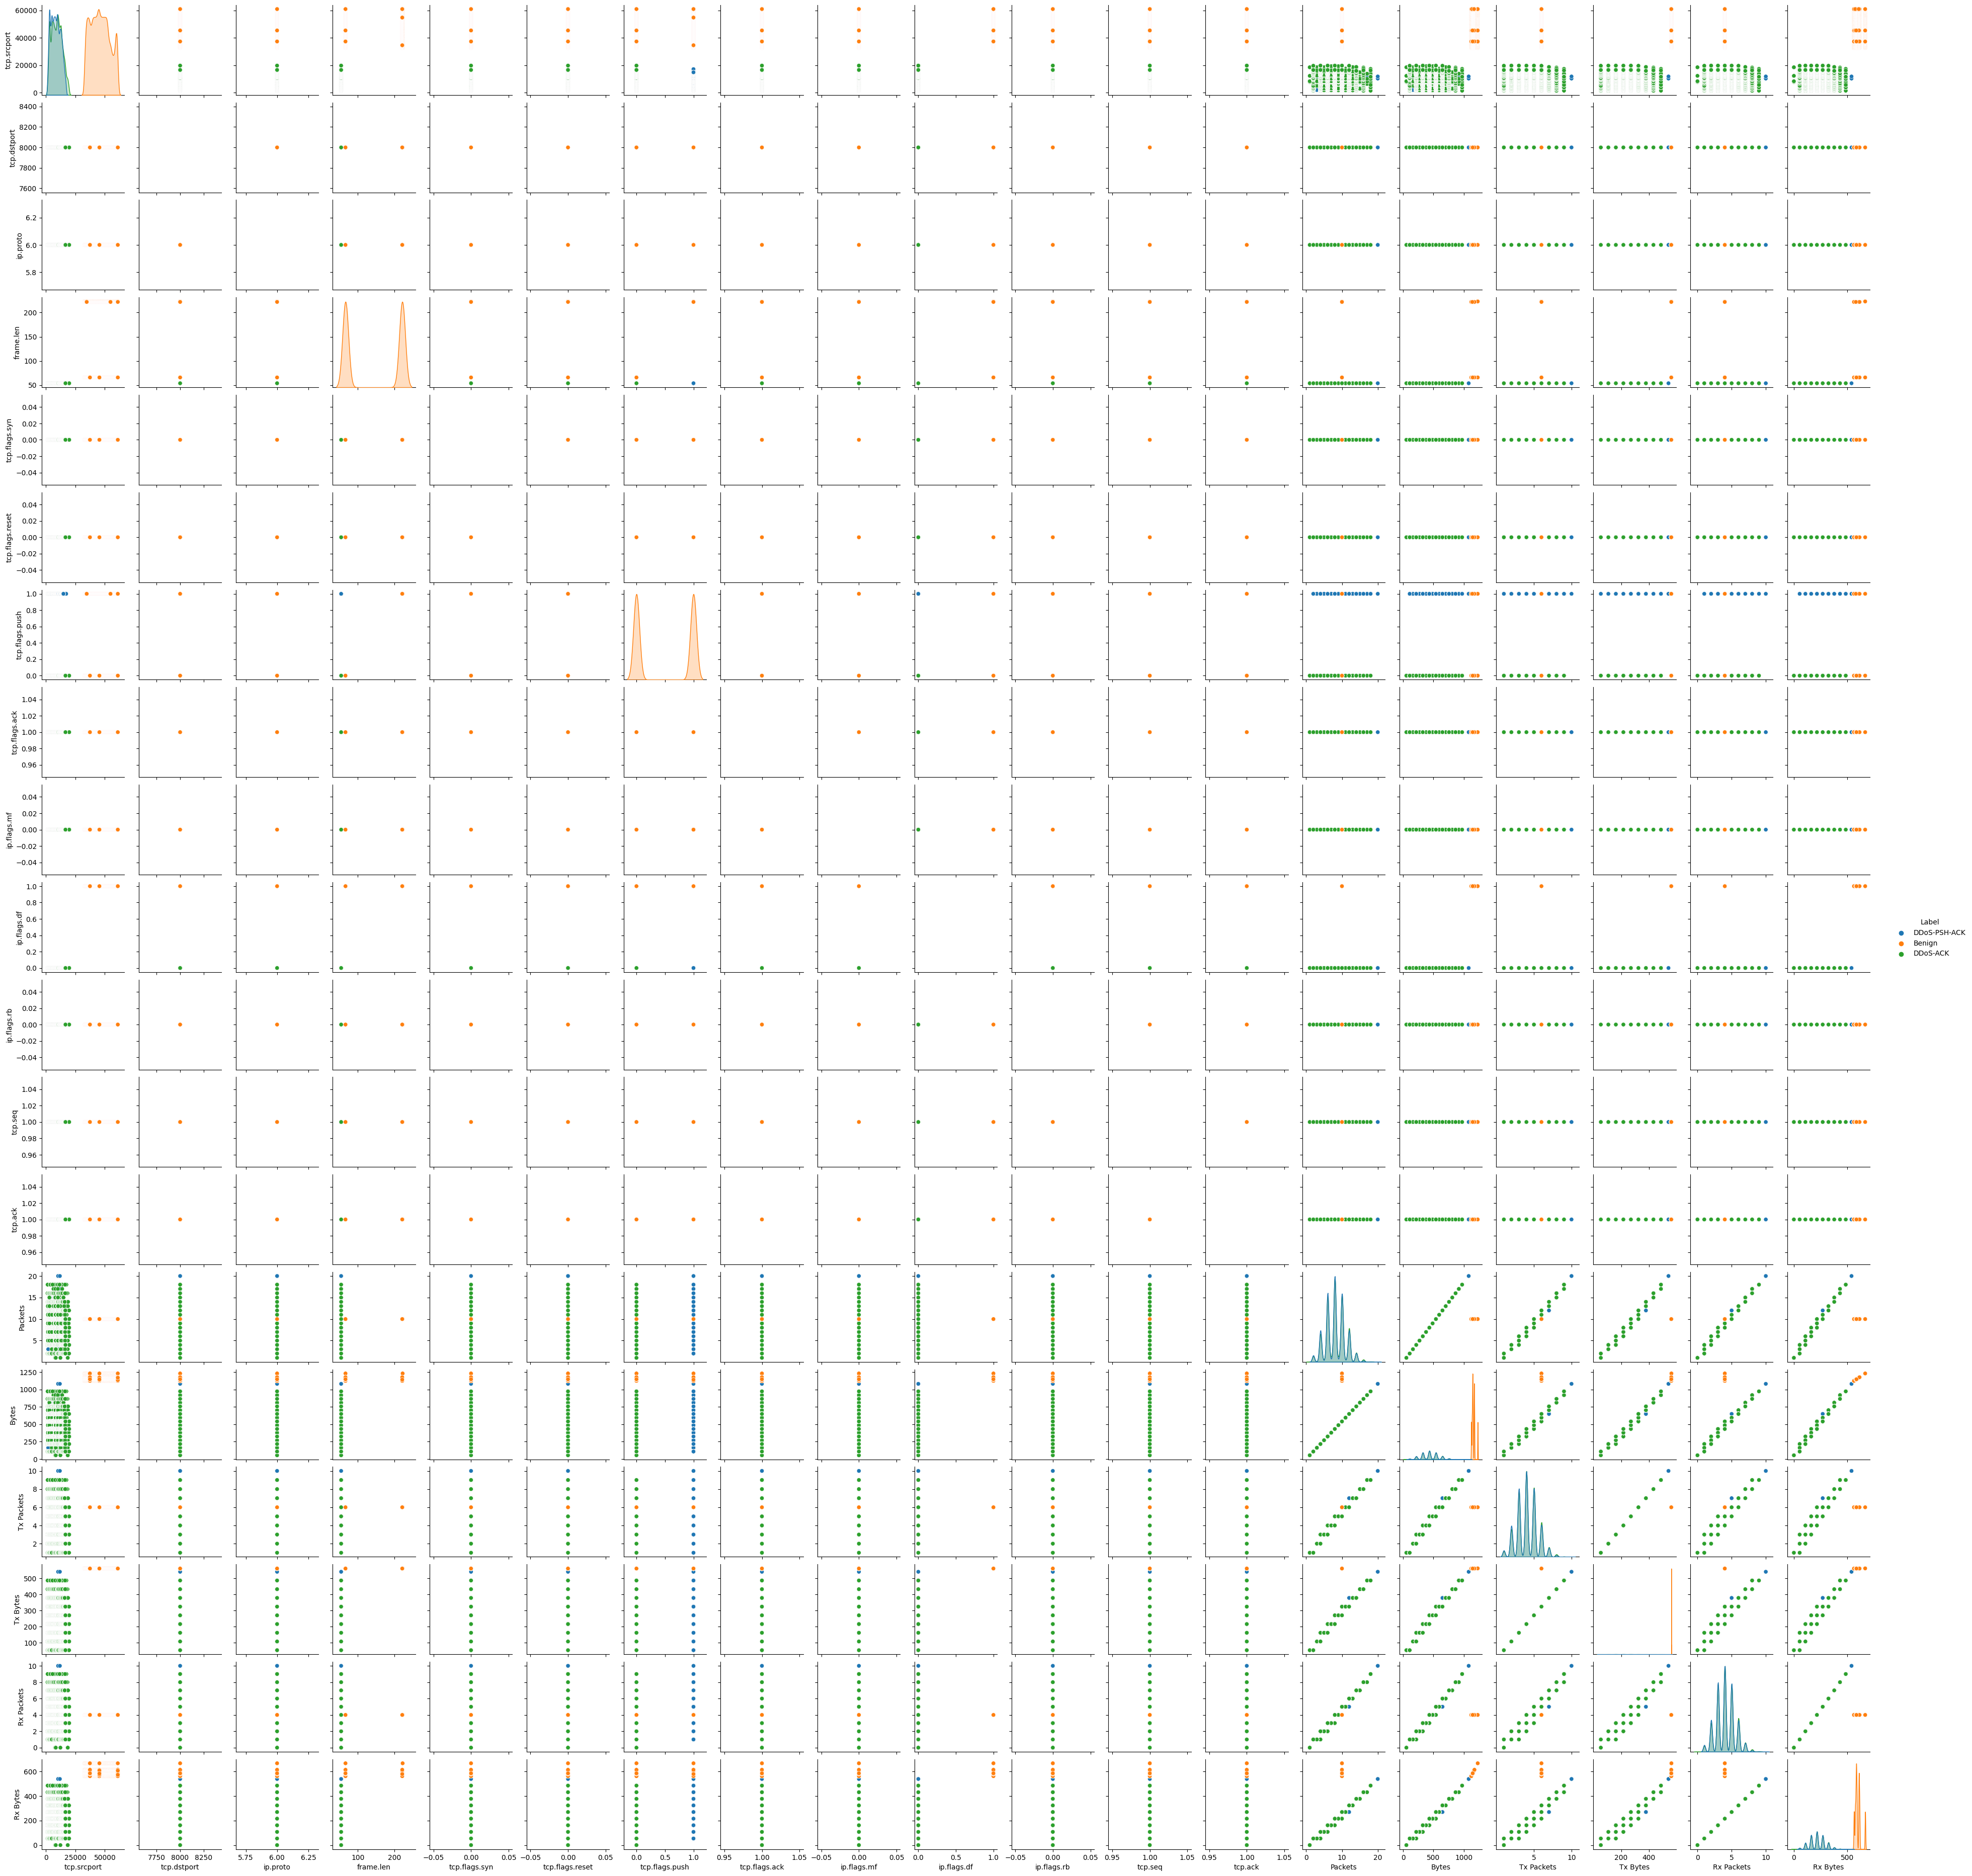

In [10]:
sns.pairplot(ddos, hue = 'Label', size = 2, diag_kind = 'kde')
plt.show()

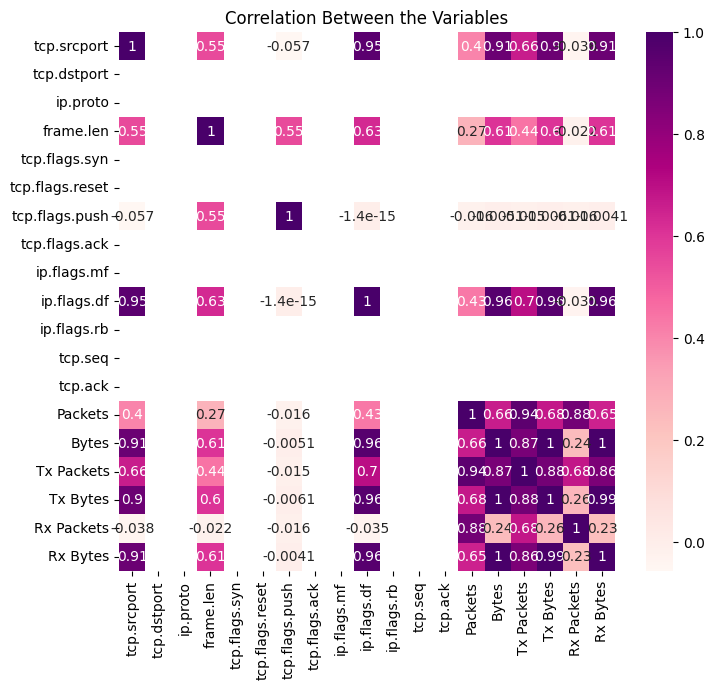

In [11]:
numeric_data = ddos.select_dtypes(include='number')# select only the columns in the DataFrame data that have numeric (number) data
correlation_matrix = numeric_data.corr()
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(correlation_matrix, annot=True,ax=ax,  cmap="RdPu")
plt.title('Correlation Between the Variables')
#plt.xticks(rotation=45);
plt.show()